In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

filename = 'Salaries.csv'
salaries_df = pd.read_csv(filename)

filename = 'Batting.csv'
batting_df = pd.read_csv(filename)

Question: Which of the batting stats best correlate/indicator of the salary the following year

1. delete pre-1990
2. merge all stints (players that played for more than one team in a season)
3. take only records with more than 30 at-bat
4. divide all stats by at-bat
5. add Salary to stats, according to playerID from Salaries.csv, but shift salary up one year
6. pick an option of finding correlation between salary and each batting stats
- find average stats/salary for the year, and the number of times above/under the average
- other already established/panda-installed method for finding correlation?

In [2]:
#1. delete pre-1990
df = batting_df[batting_df.yearID > 1990]

In [3]:
#2. merge all stints (players that played for more than one team in a season)
#group playerID and yearID
df = df.groupby(['yearID', 'playerID']).sum()

In [4]:
#3. take only records with more than 30 at-bat
df = df[df.AB > 30]

In [5]:
#4. divide all stats by at-bat
avg_df = df.div(df['AB'],axis = 'index')
avg_df = avg_df.reset_index()

In [6]:
#5. add Salary to stats, according to playerID from Salaries.csv
s_df = salaries_df[salaries_df.yearID > 1991]
s_df = s_df.groupby(['playerID'])
s_df = s_df['yearID','playerID','salary']
s_df = s_df.apply(lambda x: x) #needed this line to make it a dataframe, not sure why I didn't need this earlier for df when I also used groupby
s_df = s_df.reset_index(drop=True)

def minus1(x):
    return x - 1

s_df['yearID'] = s_df['yearID'].apply(minus1) #trying to match batting stats with the salary next year

In [7]:
#6 add salaries to the batting stat avg_df
dfNew =  s_df.merge(avg_df, on=['yearID', 'playerID'], how='inner')

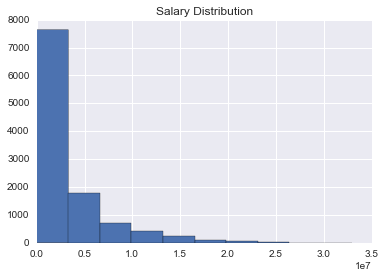

In [17]:
#Single-variable explorations, let's jump out for a second and look at the distributions of certain stats
dfNew.salary.hist()
plt.title('Salary Distribution')

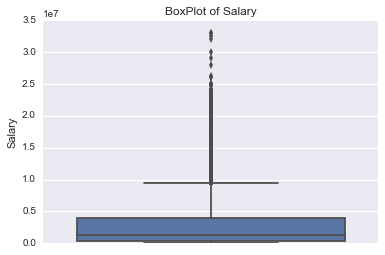

In [22]:
sns.boxplot(dfNew.salary, orient = 'v')
plt.title('BoxPlot of Salary')
plt.ylabel('Salary')

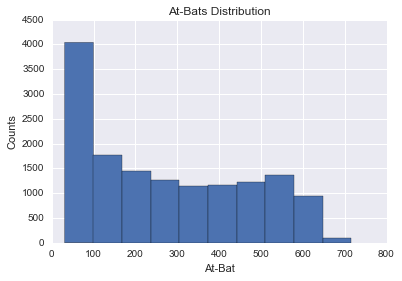

In [18]:
df.AB.hist()
plt.title('At-Bats Distribution')
plt.xlabel('At-Bat')
plt.ylabel('Counts')

In terms of distribution, we can see skewness and outliers in both Salary and At-Bat.We cannot use statistical tests that assume normality like T-tests, Z-tests, etc.

In [8]:
#7. pick an option of finding correlation between salary and each batting stats

salary_corr = dfNew.drop(['yearID','playerID','stint','G','AB'], 1)
salary_corr = salary_corr.corr()['salary']

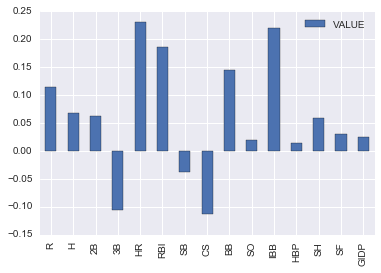

In [9]:
salary_corr = salary_corr.drop('salary',0)
dfBar = pd.DataFrame(salary_corr.values, index =  salary_corr.index.values)
dfBar.columns = ["VALUE"]
dfBar.plot(kind="bar")

AB is Nan since these are batting stats per-at-bat

Here we see the highest correlated is the Home-Run (surprise), followed by Intentional-Base-n-Ball
both makes a lot of sense, HR is self explanatory, IBB occurs to the most feared batters when pitcher rather have him walk than swing.
3rd most correlated is Runs-Batted-In, a stat highly correlated with HR at 0.8 (see heatmap below), the highest of any two stats.
Least correlated (closest to zero) are Strike-Outs (a surprise to me) and Hit-by-Pitch (tends to be accidental wild pitches).

The most negatively correlated stats are Caught-Stealing (which is a negative stat) and Triple (interestingly, a positive stat)
but at -0.11 and -0.10, neither were that closely related to salary.
Another intersting stat is Ground-Into-Double-Play which is a negative stat but having a positive correlation at 0.02
My hypothesis is that the good hitters are more frequently put into positions where runners are on base.

Missing Data: None for avg_df (see avg_df.isnull().sum() below) since I've chosen 1990 as a cut off point of this analysis. Two reasons:
1. Not all batting stats were recorded from the beginning, from In[6] at the bottom you can tell some stats were recorded since the inception of baseball, others only began to be recorded later on.
2. Since the analysis involves salary, and the salary structures changes over time, specifically each time there's a Collective Bargaining Agreement, going too far back into the past would not make sense.


LIMITATION
I acknowledge the limitation of such analysis, taking the averages of per At-Bat is rather simple, I'm sure the industry has came up with better modified averages that adjusts more finely. 
Also a player's salary is impacted by his defensive performance and intangibles, which is not accounted for in this analysis.
Also salaries are not renegotiated every year, better players gets longer contracts that performance has no impact on the salary throughout the life of the contract. If there was data on WHEN a new contract has been negotiated, the correlations should deemed stronger.

Axes(0.125,0.125;0.62x0.775)


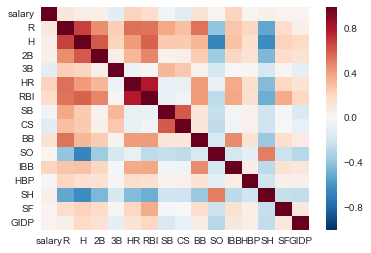

In [10]:
heatmap_corr = dfNew.drop(['yearID','playerID','stint','G','AB'], 1).corr()
print sns.heatmap(heatmap_corr)

Here's another look of the correlation but not just the salary, also between each batting stats. As mentioned earlier we can see the highly salary correlated stats (HR, RBI, BB) also correlates with each other. However, stats like R, H, 2B, while also highly correlates with other stats, don't correlates with salary as strongly.

In [11]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [12]:
batting_df.isnull().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          737
G               0
AB           5149
R            5149
H            5149
2B           5149
3B           5149
HR           5149
RBI          5573
SB           6449
CS          28603
BB           5149
SO          12987
IBB         41712
HBP          7959
SH          11487
SF          41181
GIDP        31257
dtype: int64

In [13]:
avg_df.isnull().sum()

yearID      0
playerID    0
stint       0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64